In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.optim import SGD
from torch.optim import Adam
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [24]:
model = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(32),
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(64),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(128),
    nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(128),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(128 * 8 * 8, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 10)
)

In [51]:
composed = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
composed_ext = transforms.Compose([transforms.RandomHorizontalFlip(), 
                                   transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
                                   transforms.RandomRotation(degrees=20),
                                   transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
                                   transforms.ToTensor()
                                   ])
train = dsets.CIFAR10(root='./data', train=True, download=True, transform=composed_ext)
test = dsets.CIFAR10(root='./data', train=False, download=True, transform=composed)

Files already downloaded and verified
Files already downloaded and verified


In [52]:
print(type(train))
print("------------------------------------")
print(train)

<class 'torchvision.datasets.cifar.CIFAR10'>
------------------------------------
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               RandomVerticalFlip(p=0.5)
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


In [53]:
print(len(train))
    

50000


In [54]:
x_train = train.data
y_train = train.targets
x_test = test.data
y_test = test.targets

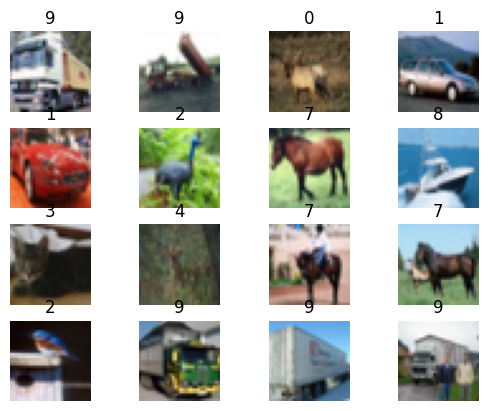

In [55]:
plt.subplot(4,4,1)
plt.imshow(x_train[1])
plt.title(y_train[1])
plt.axis('off')

plt.subplot(4,4,2)
plt.imshow(x_train[2])
plt.title(y_train[2])
plt.axis('off')

plt.subplot(4,4,3)
plt.imshow(x_train[3])
plt.title(y_test[3])
plt.axis('off')

plt.subplot(4,4,4)
plt.imshow(x_train[4])
plt.title(y_train[4])
plt.axis('off')

plt.subplot(4,4,5)
plt.imshow(x_train[5])
plt.title(y_train[5])
plt.axis('off')

plt.subplot(4,4,6)
plt.imshow(x_train[6])
plt.title(y_train[6])
plt.axis('off')

plt.subplot(4,4,7)
plt.imshow(x_train[7])
plt.title(y_train[7])
plt.axis('off')

plt.subplot(4,4,8)
plt.imshow(x_train[8])
plt.title(y_train[8])
plt.axis('off')

plt.subplot(4,4,9)
plt.imshow(x_train[9])
plt.title(y_train[9])
plt.axis('off')

plt.subplot(4,4,10)
plt.imshow(x_train[10])
plt.title(y_train[10])
plt.axis('off')

plt.subplot(4,4,11)
plt.imshow(x_train[11])
plt.title(y_train[11])
plt.axis('off')

plt.subplot(4,4,12)
plt.imshow(x_train[12])
plt.title(y_train[12])
plt.axis('off')

plt.subplot(4,4,13)
plt.imshow(x_train[13])
plt.title(y_train[13])
plt.axis('off')

plt.subplot(4,4,14)
plt.imshow(x_train[14])
plt.title(y_train[14])
plt.axis('off')

plt.subplot(4,4,15)
plt.imshow(x_train[15])
plt.title(y_train[15])
plt.axis('off')

plt.subplot(4,4,16)
plt.imshow(x_train[16])
plt.title(y_train[16])
plt.axis('off')

plt.show()

In [20]:
optimizer = Adam(model.parameters(),lr=0.01, betas=(0.9,0.99))

loss_func = nn.CrossEntropyLoss()

def batches(input , target , batchsize = 8):
    for i in range(0,input.shape[0],batchsize):
        yield(input[i : i + batchsize],target[i : i + batchsize])

In [21]:
accuracy = 0
num = 0
for epoch in range(0,20):
    accuracy = 0
    num = 0
    model.train()
    for X,Y in batches(x_train,y_train,128):
        X = torch.Tensor(X.transpose(0, 3, 1, 2)) # Convert X to a PyTorch Tensor
        Y = torch.Tensor(Y)
        prediction = model(X)
        loss = loss_func(prediction , Y.long())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        accuracy += (prediction.max(1)[1] == Y).sum().item()
        num += Y.size(0)
    print(accuracy/num)

0.1816
0.20844
0.30378
0.4323


KeyboardInterrupt: 